### How To Classify With Multiple Features Using Support Vector Machines

To start out, we will fabricate 5 clusters of "age vs. income" data for 100 people.

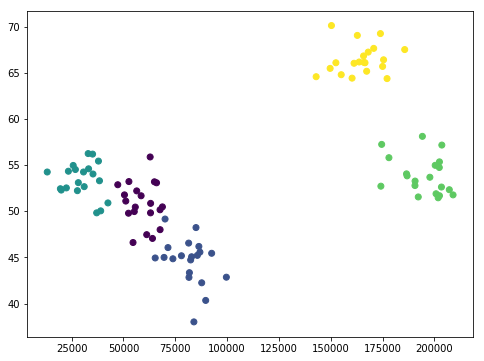

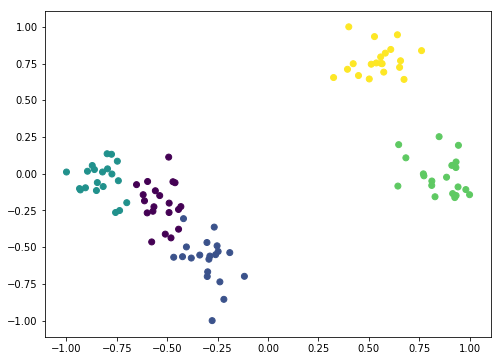

In [1]:
%matplotlib inline

import numpy as np
from pylab import *
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Now we'll use linear SVC to partition our graph into clusters.

In [2]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

By setting up a dense mesh of points in the grid and classifying all of them, we can render the regions of each cluster as distinct colors.

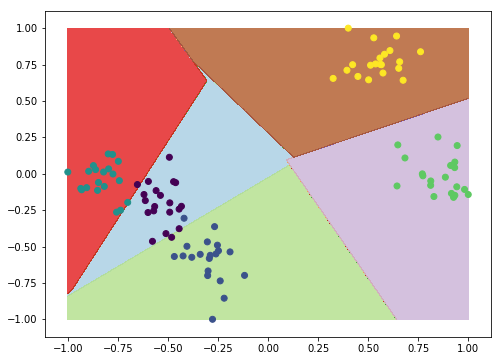

In [3]:
def plotPredictions(clf):
    # Create a dense grid of points and convert to numpy arrays
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted cluster numbers for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points
    plt.show()
    
plotPredictions(svc)

Finally, let's look at what the other scikit-learn SVC kernels have on the clusters.

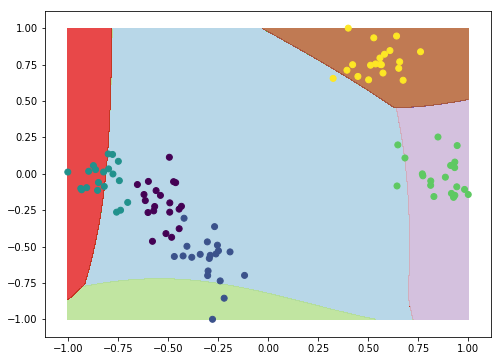

In [4]:
svc = svm.SVC(kernel='poly', C=C).fit(X, y)
plotPredictions(svc)

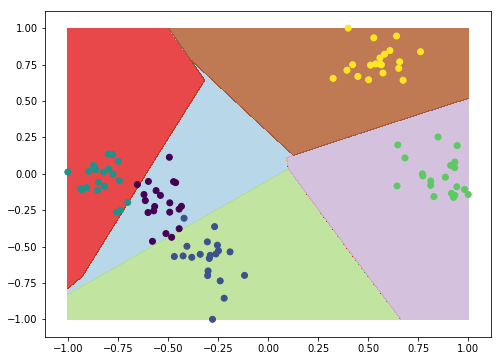

In [5]:
svc = svm.SVC(kernel='rbf', C=C).fit(X, y)
plotPredictions(svc)

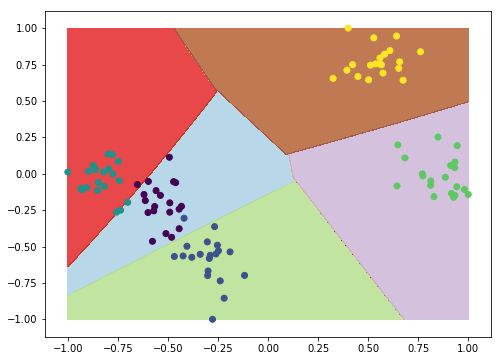

In [6]:
svc = svm.SVC(kernel='sigmoid', C=C).fit(X, y)
plotPredictions(svc)